# Regression Algorithms
To discover which algorithm works best on the dataset, use trial-and-error on a short-list of candidate algorithms.

In [22]:
import pandas
import matplotlib.pyplot as plt
from sklearn import cross_validation
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

In [4]:
# these examples use the Boston Home Price dataset
url = "housing.data"
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
dataframe = pandas.read_csv(url, delim_whitespace=True, names=names)
array = dataframe.values

In [5]:
# separate array into features (X) and label (y) parts
X = array[:,0:13]
y = array[:,13]

## Linear Algorithms

### Linear Regression
The simplest form of linear regression is one dependent variable (y) and one independent variable (x), defined by the formula $y = bx + c$ where x is the input variable, y is the predicted value, b is the regression coefficient and c is a constant. 

Linear regression with mulitple features: $Ŷ = β_0+β_1X_1+β_2X_2+β_3X_3$

See: https://codingstartups.com/practical-machine-learning-ridge-regression-vs-lasso/

In [7]:
num_folds = 10
num_instances = len(X)
seed = 8

kfold = cross_validation.KFold(n=num_instances, n_folds=num_folds, random_state=seed)
model = LinearRegression()

scoring = 'neg_mean_squared_error'
results = cross_validation.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
print(results.mean())

-34.70525594452488


### Ridge Regression
Extension of linear regression to overcome overfitting the model using regularization. Modifies the loss function to minimise the complexity of the model (measured as the sum squared value of the coefficient values). Also known as L2-norm.

$L = ∑( Ŷ_i– Y_i)2 + λ∑ β^2$

This loss function includes two elements. The first one is the sum of distances between each prediction (Ŷ) and its ground truth (Y). The second element, a.k.a the regularization term, sums over squared β values and multiplies it by another parameter λ. The reason for doing that is to “punish” the loss function for high values of the coefficients β, therefore making the model simpler and less likely to overfit.

In [10]:
num_folds = 10
num_instances = len(X)
seed = 8

kfold = cross_validation.KFold(n=num_instances, n_folds=num_folds, random_state=seed)
model = Ridge()

scoring = 'neg_mean_squared_error'
results = cross_validation.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
print(results.mean())

-34.07824620925939


### LASSO Regression
LASSO = Least Absolute Shrinkage and Selection Operator. Extension of linear regression to overcome overfitting the model using regularization. Modifies the loss function to minimuse the complexity of the model (measured as the sum absolute value of the coefficient values). Also known as L1-norm.

$L = ∑( Ŷ_i– Y_i)2 + λ∑ |β|$

The only difference from Ridge Regression is that the regularization term is in absolute value. LASSO overcomes the disadvantage of Ridge Regression by not only punishing high values of the coefficients β but actually setting them to zero if they are not relevant. Therefore, you might end up with fewer features included in the model than you started with, which is a huge advantage.

In [13]:
num_folds = 10
num_instances = len(X)
seed = 8

kfold = cross_validation.KFold(n=num_instances, n_folds=num_folds, random_state=seed)
model = Lasso()

scoring = 'neg_mean_squared_error'
results = cross_validation.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
print(results.mean())

-34.46408458830231


### ElasticNet Regression
Combines the properties of both Ridge Regression and LASSO Regression.

In [15]:
num_folds = 10
num_instances = len(X)
seed = 8

kfold = cross_validation.KFold(n=num_instances, n_folds=num_folds, random_state=seed)
model = ElasticNet()

scoring = 'neg_mean_squared_error'
results = cross_validation.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
print(results.mean())

-31.16457371424975


## Nonlinear Algorithms

### K-Nearest Neighbors (KNN)
Locates the K most similar instances in the training dataset for a new (unseen) instance. The mean (or median) y-label value of he K neighbors is used as the prediction for the new (unseen) instance.

In [17]:
num_folds = 10
num_instances = len(X)
seed = 8

kfold = cross_validation.KFold(n=num_instances, n_folds=num_folds, random_state=seed)
model = KNeighborsRegressor()

scoring = 'neg_mean_squared_error'
results = cross_validation.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
print(results.mean())

-107.28683898039215


### Classification and Regression Trees (CART)
Decision trees. Use the training data to select the best points to split the data in order to minimise a cost metric (default for regression is mean squared error).

In [19]:
num_folds = 10
num_instances = len(X)
seed = 8

kfold = cross_validation.KFold(n=num_instances, n_folds=num_folds, random_state=seed)
model = DecisionTreeRegressor()

scoring = 'neg_mean_squared_error'
results = cross_validation.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
print(results.mean())

-38.89314784313725


### Support Vector Machines (SVM)
Although originally developed for binary classification, Support Vector Machines have been extended to predict regression problems (known as Support Vector Regression).

In [21]:
num_folds = 10
num_instances = len(X)
seed = 8

kfold = cross_validation.KFold(n=num_instances, n_folds=num_folds, random_state=seed)
model = SVR()

scoring = 'neg_mean_squared_error'
results = cross_validation.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
print(results.mean())

-91.04782433324428


## Compare Algorithms

LR: -34.705256 (45.573999)
RDGE: -34.078246 (45.900034)
LASS: -34.464085 (27.888592)
EN: -31.164574 (22.708675)
KNN: -107.286839 (79.839529)
CART: -41.439517 (29.122836)
SVM: -91.047824 (71.101574)


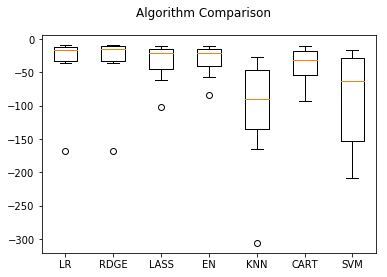

In [25]:
# prepare configuration for cross validation test
num_folds = 10
num_instances = len(X)
seed = 8

# prepare models
models = []
models.append(('LR', LinearRegression()))
models.append(('RDGE', Ridge()))
models.append(('LASS', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVM', SVR()))

# evaluate each model in turn
results = []
names = []
scoring = 'neg_mean_squared_error'
for name, model in models:
    kfold = cross_validation.KFold(n=num_instances, n_folds=num_folds, random_state=seed)
    cv_results = cross_validation.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()